# Multilinear Regression - Startups Dataset

> ### Import the libraries and read the data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
data = pd.read_csv(r'C:\Users\Admin\Desktop\Cs\MLT\Sample\50_Startups.csv')

> ### Print the values

In [2]:
data.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


> ### Data Preprocessing - Check for Null Values and remove outliers

In [3]:
data.isnull().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

In [4]:
data.columns

Index(['R&D Spend', 'Administration', 'Marketing Spend', 'State', 'Profit'], dtype='object')

<AxesSubplot:>

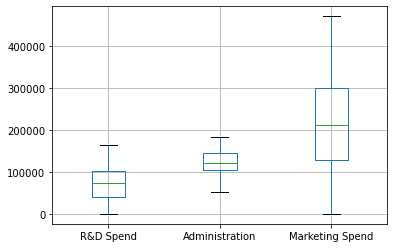

In [5]:
data.boxplot(column=['R&D Spend', 'Administration', 'Marketing Spend'])

> ### Label encoding

In [6]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data['State'] = le.fit_transform(data['State'])

In [7]:
data.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,2,192261.83
1,162597.70,151377.59,443898.53,0,191792.06
2,153441.51,101145.55,407934.54,1,191050.39
3,144372.41,118671.85,383199.62,2,182901.99
4,142107.34,91391.77,366168.42,1,166187.94


> ### Store the value of features and target output in seperate DataFrames

In [8]:
x = data.iloc[:,:-1].values 
y = data.iloc[:,-1].values 

In [9]:
x1 = pd.DataFrame(x)
x1.head()

,0,1,2,3
0,165349.20,136897.80,471784.10,2.0
1,162597.70,151377.59,443898.53,0.0
2,153441.51,101145.55,407934.54,1.0
3,144372.41,118671.85,383199.62,2.0
4,142107.34,91391.77,366168.42,1.0


In [10]:
x1.columns = ['R&D Spend', 'Administration', 'Marketing Spend', 'State']
x1.head()

,R&D Spend,Administration,Marketing Spend,State
0,165349.20,136897.80,471784.10,2.0
1,162597.70,151377.59,443898.53,0.0
2,153441.51,101145.55,407934.54,1.0
3,144372.41,118671.85,383199.62,2.0
4,142107.34,91391.77,366168.42,1.0


In [11]:
x1['INTERCEPT'] = 1

> ### Check if there is multicollinearity

In [12]:
vif = pd.DataFrame()

In [13]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif['variables'] = x1.columns
vif

,variables
0,R&D Spend
1,Administration
2,Marketing Spend
3,State
4,INTERCEPT


In [14]:
vif['vif'] = [variance_inflation_factor(x1.values,i) for i in range(x1.shape[1])]
vif

,variables,vif
0,R&D Spend,2.481178
1,Administration,1.175315
2,Marketing Spend,2.326780
3,State,1.011281
4,INTERCEPT,26.570692


#### VIF < 3 - No multicollinearity

In [15]:
x

array([[1.6534920e+05, 1.3689780e+05, 4.7178410e+05, 2.0000000e+00],
       [1.6259770e+05, 1.5137759e+05, 4.4389853e+05, 0.0000000e+00],
       [1.5344151e+05, 1.0114555e+05, 4.0793454e+05, 1.0000000e+00],
       [1.4437241e+05, 1.1867185e+05, 3.8319962e+05, 2.0000000e+00],
       [1.4210734e+05, 9.1391770e+04, 3.6616842e+05, 1.0000000e+00],
       [1.3187690e+05, 9.9814710e+04, 3.6286136e+05, 2.0000000e+00],
       [1.3461546e+05, 1.4719887e+05, 1.2771682e+05, 0.0000000e+00],
       [1.3029813e+05, 1.4553006e+05, 3.2387668e+05, 1.0000000e+00],
       [1.2054252e+05, 1.4871895e+05, 3.1161329e+05, 2.0000000e+00],
       [1.2333488e+05, 1.0867917e+05, 3.0498162e+05, 0.0000000e+00],
       [1.0191308e+05, 1.1059411e+05, 2.2916095e+05, 1.0000000e+00],
       [1.0067196e+05, 9.1790610e+04, 2.4974455e+05, 0.0000000e+00],
       [9.3863750e+04, 1.2732038e+05, 2.4983944e+05, 1.0000000e+00],
       [9.1992390e+04, 1.3549507e+05, 2.5266493e+05, 0.0000000e+00],
       [1.1994324e+05, 1.5654742e+

> ### Split into training and testing set

In [16]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=0) # test_size -> 70:30

In [17]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(37, 4)
(37,)
(13, 4)
(13,)


> ### Apply linear regression and fit the model

In [18]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(x_train,y_train)

LinearRegression()

### Print the slopes and intercept
*  y = b0 + b1x1 + b2x2 + ... + bnxn
*  b0 - intercept
*  b1,b2,..bn - slope

In [19]:
print(reg.intercept_)
print(reg.coef_)   #slope

41091.206521703396
[  0.78258471   0.04496351   0.0327938  -11.61886233]


> ### Predict the values

In [20]:
y_pred = reg.predict(x_test)

> ### Find R2 value

In [21]:
from sklearn.metrics import r2_score
print(r2_score(y_test,y_pred)*100,'%')

93.25447894242299 %


> ### Predicted vs acual value graph

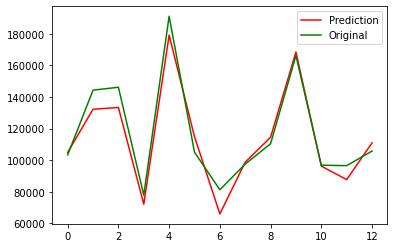

In [22]:
plt.plot(y_pred,c='r',label='Prediction')
plt.plot(y_test,c='g',label='Original')
plt.legend()
plt.show()

In [26]:
import pickle
file = open('startup.pkl','wb')
pickle.dump(reg, file)

In [27]:
model = open('startup.pkl','rb')

In [28]:
pickle.load(model)

LinearRegression()